## 631 Day 75 Goals_ what you will make by the end of the day

**Wrestle the Android App Store Data into Beautiful Looking Charts with Plotly**
![01](https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-34-37-bf9653f25c6b0a4798b5e7b7239aed34.png)

Have you ever thought about building your own an iOS or Android app? If so, then you probably have wondered about how things work in the app stores. Today we'll replicate some of the app store analytics provided by companies like App Annie or Sensor Tower that helps inform development and app marketing strategies for many companies. This stuff is BIG business!

In this module, we will compare thousands of apps in the Google Play Store so that we can gain insight into:

- How competitive different app categories (e.g., Games, Lifestyle, Weather) are
- Which app category offers compelling opportunities based on its popularity
- How many downloads you would give up by making your app paid vs. free
- How much you can reasonably charge for a paid app
- Which paid apps have had the highest revenue
- How many paid apps will recoup their development costs based on their sales revenue

Today you'll learn:

- How to quickly remove duplicates
- How to remove unwanted symbols and convert data into a numeric format
- How to wrangle columns containing nested data with Pandas
- How to create compelling data visualisations with the plotly library
- Create vertical, horizontal and grouped bar charts
- Create pie and donut charts for categorical data
- Use colour scales to make beautiful scatter plots

Download and add the Notebook to Google Drive

As usual, download the .zip file from this lesson and extract it. Add the .ipynb file into your Google Drive and open it as a Google Colaboratory notebook.

Add the Data to the Notebook

The .zip file also includes a .csv file. This is the data for the project. Add this your notebook.


In [115]:
import pandas as pd

In [116]:
df_apps = pd.read_csv('apps.csv')

In [117]:
df_apps.head(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


## 632 Data Cleaning_ Removing NaN Values and Duplicates

The first step as always is getting a better idea about what we're dealing with.

**Preliminary Data Exploration**

#### Challenge: How many rows and columns does df_apps have? What are the column names? What does the data look like? Look at a random sample of 5 different rows with .sample()


In [118]:
df_apps.shape

(10841, 12)

In [119]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


In [120]:
df_apps.sample(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3761,BL Kennedy Theme,PERSONALIZATION,4.2,279,1.1,"10,000",Free,0,Everyone,Personalization,"May 6, 2013",2.1 and up
5414,ez Share Android app,PHOTOGRAPHY,3.3,1461,13.0,"100,000",Free,0,Everyone,Photography,"August 31, 2017",2.3 and up
73,FP Boss,FINANCE,NaN,1,5.8,1,Free,0,Everyone,Finance,"July 27, 2018",5.0 and up
1058,BG MUSIC PLAYER - MUSIC PLAYER,VIDEO_PLAYERS,NaN,0,8.6,100,Free,0,Everyone,Video Players & Editors,"June 26, 2018",4.1 and up
5406,autoricardo.ch – vehicles,LIFESTYLE,3.3,1045,13.0,"100,000",Free,0,Everyone,Lifestyle,"March 13, 2018",4.0 and up


#### Challenge: Remove the columns called Last_Updated and Android_Version from the DataFrame. We will not use these columns.

![01](./images/01.png)

How to adjust image size in markdown? The above one is too big.

![02](./images/02.png)

Resized Image -

<img src='./images/01.png' alt='01.png' width='600'/>

In [121]:
# Remove the columns called Last_Updated and Android_Version from the DataFrame.
df_apps.drop(["Last_Updated", "Android_Ver"], axis=1, inplace=True)

In [122]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 847.1+ KB


10 columns remaining.

#### Challenge: How many rows have a NaN value (not-a-number) in the Rating column? Create DataFrame called df_apps_clean that does not include these rows.

In [123]:
df_apps['Rating'].isnull().values.any()

np.True_

In [124]:
df_apps['Rating'].isnull().values.sum()

np.int64(1474)

In [125]:
df_apps.isna()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False


We can see that the first few columns contain the NaN value.

In [126]:
df_apps.head(n=10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business
5,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2,0,Free,0,Everyone,Art & Design
6,Pekalongan CJ,SOCIAL,NaN,0,5.9,0,Free,0,Teen,Social
7,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56.0,0,Paid,$3.99,Everyone,Travel & Local
8,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0,Paid,$154.99,Everyone,Productivity
9,Eu sou Rico,FINANCE,NaN,0,2.6,0,Paid,$30.99,Everyone,Finance


In [127]:
df_apps_clean = df_apps.dropna()

In [128]:
# Initially the dataframe contained 10841 rows, if we drop the 1474 NaN rows - 
10841 - 1474

9367

In [129]:
# we should now have 9367 rows
df_apps_clean.shape

(9367, 10)

#### Challenge: Are there any duplicates in data? Check for duplicates using the .duplicated() function. How many entries can you find for the "Instagram" app? Use .drop_duplicates() to remove any duplicates from df_apps_clean.

In [130]:
df_apps_clean.duplicated()

21       False
28       False
47       False
82       False
99       False
         ...  
10836    False
10837    False
10838    False
10839     True
10840    False
Length: 9367, dtype: bool

In [131]:
df_apps_clean.duplicated().values.sum()

np.int64(476)

In [132]:
# what does the current df look like?
df_apps_clean.head(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0,Everyone,Medical


In [133]:
# how many entries are for the "Instagram" app?
df_apps_clean[df_apps_clean['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


So truly, column 10806 and column 10809 are duplicates

In [134]:
len(df_apps_clean[df_apps_clean['App'] == 'Instagram'])

4

**Use .drop_duplicates() to remove any duplicates from df_apps_clean.**

<img src='./images/03.png' alt='01.png' width='600'/>

In [135]:
df_apps_clean2 = df_apps_clean.drop_duplicates()

In [136]:
df_apps_clean2.duplicated().values.any()

np.False_

In [137]:
df_apps_clean2[df_apps_clean2['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [138]:
# Now if we want to have only one "Instagram" row? We have to tell the code to consider nly specific columns
df_apps_clean3 = df_apps_clean2.drop_duplicates(subset=["App", "Type", "Price"])

In [139]:
df_apps_clean3[df_apps_clean3['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social


In [140]:
df_apps_clean3.shape

(8199, 10)

This leaves us with 8,199 entries after removing duplicates. Huzzah! 💪

**What else should I know about the data?**

So we can see that 13 different features were originally scraped from the Google Play Store.


- Obviously, the data is just a sample out of all the Android apps. It doesn't include all Android apps of which there are millions.

- I’ll assume that the sample is representative of the App Store as a whole. This is not necessarily the case as, during the web scraping process, this sample was served up based on geographical location and user behaviour of the person who scraped it - in our case Lavanya Gupta.

- The data was compiled around 2017/2018. The pricing data reflect the price in USD Dollars at the time of scraping. (developers can offer promotions and change their app’s pricing).

- I’ve converted the app’s size to a floating-point number in MBs. If data was missing, it has been replaced by the average size for that category.

- The installs are not the exact number of installs. If an app has 245,239 installs then Google will simply report an order of magnitude like 100,000+. I’ve removed the '+' and we’ll assume the exact number of installs in that column for simplicity.



Here’s what you would see under an Android app listing if you go to a listing on the Google Play Store:

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-48-11-f6ba2e6e8c46047d93a8c2d1baaa68d1.png' width='800' />

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-48-18-97ccd1a03fd69d43ea1a1635e1e521d8.png' width='800' />

## 633 Preliminary Exploration_ The Highest Ratings, Most Reviews, and Largest Size

#### Challenge: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [141]:
df_apps_clean3.head(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0,Everyone,Medical


Only apps with very few reviews (and a low number on installs) have perfect 5 star ratings (most likely by friends and family).

In [142]:
df_apps_clean3['Rating'].max()

np.float64(5.0)

In [143]:
df_apps_with_highest_rating = df_apps_clean3[df_apps_clean3['Rating'] == df_apps_clean3['Rating'].max()]

In [144]:
# getting the app names as a list
df_apps_with_highest_rating['App'].tolist()

['KBA-EZ Health Guide',
 'Ra Ga Ba',
 'Mu.F.O.',
 'Brick Breaker BR',
 'Anatomy & Physiology Vocabulary Exam Review App',
 'Tablet Reminder',
 'CQ ESPM',
 'Clinic Doctor EHr',
 'EB Cash Collections',
 'CZ-Help',
 'CB Heroes',
 'ei Calc',
 'CG Jobs',
 'Bh Public School',
 'EJ messenger',
 'BU Study',
 'CB Register',
 'Basics of Orthopaedics',
 'ER Assist',
 'CJ the REALTOR',
 'Story Time FD',
 'NCLEX Multi-topic Nursing Exam Review-Quiz & notes',
 'DN Blog',
 'Barbers.BH',
 'Trovami se ci riesci',
 'EC Mover',
 'Monster Ride Pro',
 'FAST EO',
 'AC DC Power Monitor',
 'DT CLOTHINGS',
 '30WPM Amateur ham radio Koch CW Morse code trainer',
 'BM speed test',
 'FK CLASSIC FOR YOU',
 'CZ Kompas',
 'AJ Rafael Music Lessons',
 'AJ Gray Dark Icon Pack',
 'DF Glue Board',
 '211:CK',
 'i am EB',
 'DG OFF - 100% Free Coupons & Deals',
 'Tic Tac CK',
 'DL Image Manager',
 'EC SPORTS',
 'Labs on Demand',
 'Chronolink DX',
 "Wowkwis aq Ka'qaquj",
 'CB Fit',
 'BJ Foods',
 'Easy Hotspot Ad Free',
 'CI 1

Problem - Rating is not representative of app quality.

#### Challenge: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be a limit in place or can developers make apps as large as they please?

In [145]:
df_apps_with_highest_size = df_apps_clean3[df_apps_clean3['Size_MBs'] == df_apps_clean3['Size_MBs'].max()]

In [146]:
df_apps_with_highest_size.head(n=10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1795,Navi Radiography Pro,MEDICAL,4.7,11,100.0,500,Paid,$15.99,Everyone,Medical
3144,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,"5,000",Free,0,Everyone,Health & Fitness
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100.0,"10,000",Free,0,Everyone,Racing
7926,Post Bank,FINANCE,4.5,60449,100.0,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.0,22435,100.0,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,"1,000,000",Paid,$0.99,Everyone 10+,Action
8718,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,"5,000,000",Free,0,Everyone,Sports
8719,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,"5,000,000",Free,0,Everyone,Sports
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
9943,Miami crime simulator,GAME,4.0,254518,100.0,"10,000,000",Free,0,Mature 17+,Action


Here we can clearly see that there seems to be an upper bound of 100 MB for the size of an app. A quick google search would also have revealed that this limit is imposed by the Google Play Store itself. It’s interesting to see that a number of apps actually hit that limit exactly.

#### Challenge: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [147]:
df_apps_with_highest_reviews = df_apps_clean3[df_apps_clean3['Reviews'] == df_apps_clean3['Reviews'].max()]

In [148]:
df_apps_with_highest_reviews

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.3,"1,000,000,000",Free,0,Teen,Social


In [149]:
# So there is only one app with highest review. So I need to sort the df based on the number of reviews.
df_apps_clean3.sort_values('Reviews', ascending=False).head(n=50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.5,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.6,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.5,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.6,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [150]:
# Are there any paid apps among the top 50?
df_with_high_reviews = df_apps_clean3.sort_values('Reviews', ascending=False).head(n=50)
df_with_high_reviews[df_with_high_reviews['Price'] == 0]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


In [151]:
df_with_high_reviews['Price'].dtype

dtype('O')

<img src='./images/04.png' alt='04.png' width='400'/>

In [152]:
# Let's change the data type in the ratings column to integer
df_with_high_reviews['Price'] = df_with_high_reviews['Price'].astype('int')

In [153]:
df_with_high_reviews['Price'].dtype

dtype('int64')

In [154]:
# Are there any paid apps among the top 50?
df_with_high_reviews[df_with_high_reviews['Price'] > 0]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


No paid apps among the top 50.

If you look at the number of reviews, you can find the most popular apps on the Android App Store. These include the usual suspects: Facebook, WhatsApp, Instagram etc. What’s also notable is that the list of the top 50 most reviewed apps does not include a single paid app! 🤔

## 634 Data Visualisation with Plotly_ Create Pie and Donut Charts


All Android apps have a content rating like “Everyone” or “Teen” or “Mature 17+”. Let’s take a look at the distribution of the content ratings in our dataset and see how to visualise it with plotly - a popular data visualisation library that you can use alongside or instead of Matplotlib.

In [155]:
# First, we’ll count the number of occurrences of each rating with .value_counts()
df_apps_clean3['Content_Rating'].value_counts()

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

**The first step in creating charts with plotly is to import `plotly.express`. This is the fastest way to create a beautiful graphic with a minimal amount of code in plotly.**

In jupyter notebook, it is a bit tricky to install modules. Just open a new terminal and type `pip install plotly`

In [156]:
import plotly.express as px

In [157]:
# To create a pie chart we simply call px.pie() and then .show() the resulting figure. 
# Plotly refers to all their figures, be they line charts, bar charts, or pie charts as graph_objects.
df_apps_content_ratings = df_apps_clean3['Content_Rating'].value_counts()
fig = px.pie(labels=df_apps_content_ratings.index, values=df_apps_content_ratings.values)

In [158]:
fig.show()

Let’s customise our pie chart. Looking at the .pie() documentation we see a number of parameters that we can set, like title or names.

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_12-00-52-8e188db47a2c59e78c59597ac9f58130.png' />

If you’d like to configure other aspects of the chart, that you can’t see in the list of parameters, you can call a method called .update_traces(). In plotly lingo, “traces” refer to graphical marks on a figure. Think of “traces” as collections of attributes. Here we update the traces to change how the text is displayed.

In [159]:
fig = px.pie(labels=df_apps_content_ratings.index,
values=df_apps_content_ratings.values,
title="Content Rating", # add the title of the chart
names=df_apps_content_ratings.index, # add the legends
)
fig.update_traces(textposition='outside', textinfo='percent+label') # add the names of each slice
fig.show()

In [160]:
# To create a donut 🍩 chart, we can simply add a value for the hole argument:
fig = px.pie(labels=df_apps_content_ratings.index,
values=df_apps_content_ratings.values,
title="Content Rating",
names=df_apps_content_ratings.index,
hole=0.6, # add the hole
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent') # the names of the slices, now on the inside, just the %
fig.show()

Yum! 😋

## 635 Numeric Type Conversions for the Installations & Price Data

**Challenge - How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?**

In [161]:
df_apps_clean3.head(n=3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,$0.99,Everyone,Arcade


In [162]:
df_apps_clean3['Installs'].dtype

dtype('O')

<img src='./images/04.png' alt='04.png' width='400'/>

In [163]:
# Let's see what kind of values are in the "Installs" column
df_apps_clean3.groupby('Installs').count()

,App,Category,Rating,Reviews,Size_MBs,Type,Price,Content_Rating,Genres
Installs,,,,,,,,,
1,3,3,3,3,3,3,3,3,3
"1,000",698,698,698,698,698,698,698,698,698
"1,000,000",1417,1417,1417,1417,1417,1417,1417,1417,1417
"1,000,000,000",20,20,20,20,20,20,20,20,20
10,69,69,69,69,69,69,69,69,69
"10,000",988,988,988,988,988,988,988,988,988
"10,000,000",933,933,933,933,933,933,933,933,933
100,303,303,303,303,303,303,303,303,303
"100,000",1096,1096,1096,1096,1096,1096,1096,1096,1096


In [164]:
# convert the dtype to int
# df_apps_clean3['Installs'] = df_apps_clean3['Installs'].astype('int')


`df_apps_clean3['Installs'] = df_apps_clean3['Installs'].astype('int')`


>ValueError: invalid literal for int() with base 10: '1,000'


We need to remove the commas from the column

In [165]:
df_apps_clean3['Installs'] = df_apps_clean3['Installs'].str.replace(',', '')

C:\Users\User\AppData\Local\Temp\ipykernel_32256\575539045.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



When I use the following code - 

`
df_apps_clean3['Installs'] = df_apps_clean3['Installs'].str.replace(',', '')
`

I get the following error - 

> A value is trying to be set on a copy of a slice from a DataFrame.
> 
>Try using .loc[row_indexer,col_indexer] = value instead


<img src='./images/05.png' alt='04.png' width='600'/>

In [166]:
df_apps_clean3.groupby('Installs').count()

,App,Category,Rating,Reviews,Size_MBs,Type,Price,Content_Rating,Genres
Installs,,,,,,,,,
1,3,3,3,3,3,3,3,3,3
10,69,69,69,69,69,69,69,69,69
100,303,303,303,303,303,303,303,303,303
1000,698,698,698,698,698,698,698,698,698
10000,988,988,988,988,988,988,988,988,988
100000,1096,1096,1096,1096,1096,1096,1096,1096,1096
1000000,1417,1417,1417,1417,1417,1417,1417,1417,1417
10000000,933,933,933,933,933,933,933,933,933
100000000,189,189,189,189,189,189,189,189,189


Nevertheless, all values have changed

In [167]:
# Now
df_apps_clean3['Installs'] = df_apps_clean3['Installs'].astype('int')

C:\Users\User\AppData\Local\Temp\ipykernel_32256\3270720000.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
df_apps_clean3['Installs'].dtype

dtype('int64')

In [169]:
len(df_apps_clean3['Installs'][df_apps_clean3['Installs'] >= 1000000000])

20

In [170]:
df_apps_clean3[["Installs", "App"]].groupby("Installs").count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


**Challenge - Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.**

In [171]:
df_apps_clean3.head(n=3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,$0.99,Everyone,Arcade


In [172]:
df_apps_clean3["Price"].dtype

dtype('O')

In [173]:
df_apps_clean3['Price'] = df_apps_clean3['Price'].astype(str).str.replace('$', '')

C:\Users\User\AppData\Local\Temp\ipykernel_32256\3743182712.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
df_apps_clean3.head(n=3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade


In [175]:
df_apps_clean3['Price'] = df_apps_clean3['Price'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_32256\203222736.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
df_apps_clean3.head(n=3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade


In [177]:
# finding the 20 most expensive apps
df_apps_clean3.sort_values("Price", ascending=False).head(n=20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance
5765,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle
3554,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle
1331,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
1946,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
4606,I Am Rich Premium,FINANCE,4.1,1867,4.700000,50000,Paid,399.99,Everyone,Finance


**Challenge - Remove all apps that cost more than $250 from the df_apps_clean DataFrame.**

In [178]:
df_apps_clean3[df_apps_clean3["Price"] > 250]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1331,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment
1946,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
2193,I am extremely Rich,LIFESTYLE,2.9,41,2.900000,1000,Paid,379.99,Everyone,Lifestyle
2394,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance
2461,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000000,1000,Paid,399.99,Everyone,Finance
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
3554,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle


In [179]:
len(df_apps_clean3[df_apps_clean3["Price"] > 250])

15

In [180]:
df_apps_clean4 = df_apps_clean3[df_apps_clean3["Price"] <= 250]

In [181]:
# should contain 8199 - 15 = 8184 rows
df_apps_clean4.shape

(8184, 10)

**Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest-grossing paid apps according to this estimate? Out of the top 10, how many are games?**

In [182]:
rev_est_col = df_apps_clean4['Price'] * df_apps_clean4['Installs']

In [183]:
df_apps_clean4.insert(8, 'Revenue_Estimate', rev_est_col)

In [184]:
# What are the top 10 highest-grossing paid apps according to this estimate?
df_apps_clean4.sort_values("Revenue_Estimate", ascending=False).head(n=20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
9220,Minecraft,FAMILY,4.5,2376564,19.000000,10000000,Paid,6.99,69900000.0,Everyone 10+,Arcade;Action & Adventure
8825,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,9900000.0,Mature 17+,Action
7151,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000000,1000000,Paid,6.99,6990000.0,Mature 17+,Action
7477,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.000000,1000000,Paid,5.99,5990000.0,Everyone,Photography
7977,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.851562,1000000,Paid,5.99,5990000.0,Everyone,Lifestyle
6594,DraStic DS Emulator,GAME,4.6,87766,12.000000,1000000,Paid,4.99,4990000.0,Everyone,Action
6082,Weather Live,WEATHER,4.5,76593,4.750000,500000,Paid,5.99,2995000.0,Everyone,Weather
7954,Bloons TD 5,FAMILY,4.6,190086,94.000000,1000000,Paid,2.99,2990000.0,Everyone,Strategy
6746,Card Wars - Adventure Time,FAMILY,4.3,129603,23.000000,1000000,Paid,2.99,2990000.0,Everyone 10+,Card;Action & Adventure
6856,Threema,COMMUNICATION,4.5,51110,3.500000,1000000,Paid,2.99,2990000.0,Everyone,Communication


In [185]:
# Out of the top 10, how many are games?
top_10_highest_grossing = df_apps_clean4.sort_values("Revenue_Estimate", ascending=False).head(n=10)
top_10_highest_grossing[top_10_highest_grossing["Category"] == "GAME"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
8825,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,9900000.0,Mature 17+,Action
7151,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,6.99,6990000.0,Mature 17+,Action
6594,DraStic DS Emulator,GAME,4.6,87766,12.0,1000000,Paid,4.99,4990000.0,Everyone,Action


The top spot of the highest-grossing paid app goes to … Minecraft at close to $70 million. It’s quite interesting that Minecraft (along with Bloons and Card Wars) is actually listed in the Family category rather than in the Game category. If we include these titles, we see that 7 out the top 10 highest-grossing apps are games. The Google Play Store seems to be quite flexible with its category labels.

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-11_12-43-12-4ad2dad147ff2056c53957aadd7fc38f.png' alt='' width=800 />

## 636 Plotly Bar Charts & Scatter Plots_ The Most Competitive & Popular App Categories

If you were to release an app, would you choose to go after a competitive category with many other apps? Or would you target a popular category with a high number of downloads? Or perhaps you can target a category which is both popular but also one where the downloads are spread out among many different apps. That way, even if it’s more difficult to discover among all the other apps, your app has a better chance of getting installed, right?

**Let’s analyse this with bar charts and scatter plots and figure out which categories are dominating the market.**

In [186]:
# Find the number of different categories
df_apps_clean4['Category'].nunique()

33

In [187]:
# calculate the number of apps per category
df_apps_clean4['Category'].value_counts()

Category
FAMILY                 1606
GAME                    910
TOOLS                   719
PRODUCTIVITY            301
PERSONALIZATION         298
LIFESTYLE               297
FINANCE                 296
MEDICAL                 292
PHOTOGRAPHY             263
BUSINESS                262
SPORTS                  260
COMMUNICATION           257
HEALTH_AND_FITNESS      243
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

Let's represent this distribution in a bar chart.

In [188]:
cat_dist = df_apps_clean4['Category'].value_counts()

In [189]:
bar = px.bar(
    x = cat_dist.index,
    y = cat_dist.values
)
bar.show()

Based on the number of apps, the Family and Game categories are the most competitive. Releasing yet another app into these categories will make it hard to get noticed.

But what if we look at it from a different perspective? What matters is not just the total number of apps in the category but how often apps are downloaded in that category. This will give us an idea of how popular a category is. 

**We have to group all our apps by category and sum the number of installations**

In [190]:
df_apps_clean4.groupby("Category").count()

,App,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
Category,,,,,,,,,,
ART_AND_DESIGN,61,61,61,61,61,61,61,61,61,61
AUTO_AND_VEHICLES,73,73,73,73,73,73,73,73,73,73
BEAUTY,42,42,42,42,42,42,42,42,42,42
BOOKS_AND_REFERENCE,169,169,169,169,169,169,169,169,169,169
BUSINESS,262,262,262,262,262,262,262,262,262,262
COMICS,54,54,54,54,54,54,54,54,54,54
COMMUNICATION,257,257,257,257,257,257,257,257,257,257
DATING,134,134,134,134,134,134,134,134,134,134
EDUCATION,118,118,118,118,118,118,118,118,118,118


In [191]:
category_installs = df_apps_clean4[["Category", "Installs"]].groupby("Category").sum()

In [192]:
category_installs.sort_values("Installs", ascending=True)

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


Then we can create a horizontal bar chart, simply by adding the orientation parameter.

In [193]:
category_installs_sorted = category_installs.sort_values("Installs", ascending=True)

In [194]:
h_bar = px.bar(
    x = category_installs_sorted.Installs,
    y = category_installs_sorted.index,
    orientation = 'h'
)
h_bar.show()

In [195]:
h_bar = px.bar(
    x = category_installs_sorted.Installs,
    y = category_installs_sorted.index,
    orientation = 'h',
    title='Category Popularity'
)
h_bar.update_layout(
    xaxis_title='Number of Downloads', 
    yaxis_title='Category',
    font=dict(
        family="Trebuchet MS",
        size=9,  # Set the font size here
    )
    
)
h_bar.show()

Now we see that Games and Tools are actually the most popular categories. If we plot the popularity (installs) of a category next to the number of apps (App) in that category we can get an idea of how concentrated a category is. Do few apps have most of the downloads (installs) or are the downloads spread out over many apps?

In [196]:
df_apps_clean4[["Category", "App"]].groupby("Category").count()

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


But we want a df subset where the "Installs" column will have sum values and the "App" column will have count values.

In [197]:
df_apps_clean4.groupby("Category").agg(
    {
    'Installs': pd.Series.sum,
    "App": pd.Series.count
    }
)

,Installs,App
Category,,
ART_AND_DESIGN,114233100,61
AUTO_AND_VEHICLES,53129800,73
BEAUTY,26916200,42
BOOKS_AND_REFERENCE,1665791655,169
BUSINESS,692018120,262
COMICS,44931100,54
COMMUNICATION,11039241530,257
DATING,140912410,134
EDUCATION,352852000,118


**Challenge - Let’s use plotly to create a scatter plot that looks like this:**

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_12-51-37-3937d6162a4800714f6fdcbdf2b12870.png" alt='' width=600 />

In [198]:
cat_installs_apps = df_apps_clean4.groupby("Category").agg(
    {
    'Installs': pd.Series.sum,
    "App": pd.Series.count
    }
)

In [199]:
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    color= cat_installs_apps.Installs
)

scatter_plot.show()

In [200]:
# let's adjust the range in the y_axis
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    range_y= [cat_installs_apps.Installs.min(), cat_installs_apps.Installs.max()],
    color= cat_installs_apps.Installs
)

scatter_plot.show()

In [201]:
# no change, perhaps adjusting the range of the color axis will work?
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    color= cat_installs_apps.Installs,
    range_color= [cat_installs_apps.Installs.min(), cat_installs_apps.Installs.max()] 
)

scatter_plot.show()

In [202]:
# no change still, is cat_installs_apps.Installs.min() working?
cat_installs_apps.Installs.min()

np.int64(15949410)

In [203]:
cat_installs_apps.Installs.min().dtype

dtype('int64')

In [204]:
cat_installs_apps.Installs.min() + 1

np.int64(15949411)

In [205]:
cat_installs_apps.Installs.max()

np.int64(13858762717)

In [206]:
# let's just add numbers in the scatter range
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    range_y= [15000000, 13000000000],
    color= cat_installs_apps.Installs
)

scatter_plot.show()

In [207]:
# Hmm
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    size= cat_installs_apps.App,  # set the plot sizes
    color= cat_installs_apps.Installs
)

scatter_plot.show()

**To scale the y-axis, call .update_layout() and specify that the y-axis should be on a log-scale like so: yaxis=dict(type='log')**

In [208]:
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    size= cat_installs_apps.App,  # set the plot sizes
    color= cat_installs_apps.Installs
)

scatter_plot.update_layout(
    yaxis=dict(type='log')
)

scatter_plot.show()

Our reference picture was - 

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_12-51-37-3937d6162a4800714f6fdcbdf2b12870.png" alt='' width=600 />

In [209]:
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    size= cat_installs_apps.App,  # set the plot sizes
    color= cat_installs_apps.Installs,
    hover_name= cat_installs_apps.index  # set the hover name
)

scatter_plot.update_layout(
    yaxis=dict(type='log')
)

scatter_plot.show()

In [210]:
# All that is left now is to "stretch" the diagram so the y-axis goes upto 12B
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    size= cat_installs_apps.App,  # set the plot sizes
    color= cat_installs_apps.Installs,
    hover_name= cat_installs_apps.index,  # set the hover name
)

scatter_plot.update_layout(
    xaxis_title="Number of Apps (Lower=More Concentrated)",  # set the x axis title
    yaxis_title="Installs",  # set the y axis title
    yaxis = dict(type='log'),
    # adjust the color axis so it shows value till 12B
    coloraxis = dict(
        colorbar=dict(
            title="Installs",
            tickvals=[2e9, 4e9, 6e9, 8e9, 10e9, 12e9]
            
        )
    )        
)

scatter_plot.show()

In [211]:
# We can skip the tickvals by just adjusting the width and height, the graph then automatically shows values till 12B
scatter_plot = px.scatter(
    x= cat_installs_apps.App,
    y= cat_installs_apps.Installs,
    title='Category Concentration',
    size= cat_installs_apps.App,  # set the plot sizes
    color= cat_installs_apps.Installs,
    hover_name= cat_installs_apps.index,  # set the hover name
    width= 1000,
    height=500
)

scatter_plot.update_layout(
    xaxis_title="Number of Apps (Lower=More Concentrated)",  # set the x axis title
    yaxis_title="Installs",  # set the y axis title
    yaxis = dict(type='log'),
    # adjust the color axis so it shows value till 12B, not needed now
    coloraxis = dict(
        colorbar=dict(
            title="Installs",
            # tickvals=[2e9, 4e9, 6e9, 8e9, 10e9, 12e9]
            
        )
    )        
)

scatter_plot.show()

What we see is that the categories like Family, Tools, and Game have many different apps sharing a high number of downloads. But for the categories like video players and entertainment, all the downloads are concentrated in very few apps.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-16-11-a310e773b06e1efc0ad4114a12a51e01.png" alt="" width=700 />

## 637 Extracting Nested Column Data using .stack()

Let’s turn our attention to the Genres column. This is quite similar to the categories column but more granular.

**Challenge - How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's .stack() method.**



In [212]:
df_apps_clean4.head(n=3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,0.99,Everyone,Arcade


In [213]:
# How many diff types of genres are there?
df_apps_clean4['Genres'].nunique()

114

In [214]:
# Can an app belong to more than one genre?
df_apps_clean4[["App", 'Genres']]

,App,Genres
21,KBA-EZ Health Guide,Medical
28,Ra Ga Ba,Arcade
47,Mu.F.O.,Arcade
82,Brick Breaker BR,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,Medical
...,...,...
10824,Google Drive,Productivity
10828,YouTube,Video Players & Editors
10829,Google Play Movies & TV,Video Players & Editors
10831,Google News,News & Magazines


In [219]:
df_apps_clean4[["App", 'Genres']]['Genres'].value_counts()

Genres
Tools                       718
Entertainment               467
Education                   429
Productivity                301
Personalization             298
                           ... 
Casual;Music & Video          1
Tools;Education               1
Role Playing;Brain Games      1
Adventure;Education           1
Lifestyle;Pretend Play        1
Name: count, Length: 114, dtype: int64

In [218]:
df_apps_clean4[["App", 'Genres']]['App'].value_counts()

App
Calculator                                         2
Cardiac diagnosis (heart rate, arrhythmia)         2
Anatomy & Physiology Vocabulary Exam Review App    1
FK Atlantas                                        1
Tablet Reminder                                    1
                                                  ..
Google Drive                                       1
YouTube                                            1
Google Play Movies & TV                            1
Google News                                        1
Brick Breaker BR                                   1
Name: count, Length: 8182, dtype: int64

#### `.split` function

The split() function in Pandas is a string-based method that splits a string into a list of substrings based on a specified delimiter. It's a versatile tool for breaking down text data into manageable components.

Basic Usage:
```
Python

import pandas as pd
series = pd.Series(['apple banana cherry', 'grape orange', 'mango'])
split_series = series.str.split()
print(split_series)
```

This code will output:
```
0     [apple, banana, cherry]
1          [grape, orange]
2                 [mango]
dtype: object
```

In [220]:
df_apps_clean4['Genres'].str.split(';')

21                       [Medical]
28                        [Arcade]
47                        [Arcade]
82                        [Arcade]
99                       [Medical]
                   ...            
10824               [Productivity]
10828    [Video Players & Editors]
10829    [Video Players & Editors]
10831           [News & Magazines]
10835                     [Arcade]
Name: Genres, Length: 8184, dtype: object

**Nested list columns are columns in a DataFrame where each cell contains a list of values, rather than a single scalar value.**

In [221]:
# ok so now let's split the column
df_apps_clean4['Genres'] = df_apps_clean4['Genres'].str.split(';')

C:\Users\User\AppData\Local\Temp\ipykernel_32256\51474904.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
# now the column has been splitted, let's see what the column looks like
df_apps_clean4['Genres']

21                       [Medical]
28                        [Arcade]
47                        [Arcade]
82                        [Arcade]
99                       [Medical]
                   ...            
10824               [Productivity]
10828    [Video Players & Editors]
10829    [Video Players & Editors]
10831           [News & Magazines]
10835                     [Arcade]
Name: Genres, Length: 8184, dtype: object

Can't understand if proper splitting has been carried out, perhaps doing a nunique() will pull up the unique values?
```
df_apps_clean4['Genres'].nunique()
```

```
TypeError: unhashable type: 'list'
```

**Let's check what happens when you use .value_counts() on a column with nested values**

In [226]:
df_apps_clean4['Genres'].value_counts()

Genres
[Tools]                        718
[Entertainment]                467
[Education]                    429
[Productivity]                 301
[Personalization]              298
                              ... 
[Casual, Music & Video]          1
[Tools, Education]               1
[Role Playing, Brain Games]      1
[Adventure, Education]           1
[Lifestyle, Pretend Play]        1
Name: count, Length: 114, dtype: int64

In [503]:
# Nope
df_apps_clean4[["App", 'Genres']]['Genres'].value_counts()

Genres
[Tools]                        718
[Entertainment]                467
[Education]                    429
[Productivity]                 301
[Personalization]              298
                              ... 
[Casual, Music & Video]          1
[Tools, Education]               1
[Role Playing, Brain Games]      1
[Adventure, Education]           1
[Lifestyle, Pretend Play]        1
Name: count, Length: 114, dtype: int64

Yep, now I can see that the splitting has taken place.

So this is what the ```.stack()``` method does - 

<img src="./images/06.png" width=500 />

In [223]:
# so in our case
df_apps_clean4[["App", 'Genres']]

,App,Genres
21,KBA-EZ Health Guide,[Medical]
28,Ra Ga Ba,[Arcade]
47,Mu.F.O.,[Arcade]
82,Brick Breaker BR,[Arcade]
99,Anatomy & Physiology Vocabulary Exam Review App,[Medical]
...,...,...
10824,Google Drive,[Productivity]
10828,YouTube,[Video Players & Editors]
10829,Google Play Movies & TV,[Video Players & Editors]
10831,Google News,[News & Magazines]


In [229]:
# hmm, let's store this into another df, for safety
df_app_genres = df_apps_clean4[["App", 'Genres']]

In [230]:
df_app_genres.head(n=3)

,App,Genres
21,KBA-EZ Health Guide,[Medical]
28,Ra Ga Ba,[Arcade]
47,Mu.F.O.,[Arcade]


In [232]:
df_app_genres_stacked = df_app_genres.stack()

In [233]:
df_app_genres_stacked.head(n=5)

21  App       KBA-EZ Health Guide
    Genres              [Medical]
28  App                  Ra Ga Ba
    Genres               [Arcade]
47  App                   Mu.F.O.
dtype: object

In [234]:
df_app_genres_stacked.unstack().head(n=3)

,App,Genres
21,KBA-EZ Health Guide,[Medical]
28,Ra Ga Ba,[Arcade]
47,Mu.F.O.,[Arcade]


In [246]:
# the jhamela is that we have lists in the "Genres" column
df_app_genres["Genres"]

21                       [Medical]
28                        [Arcade]
47                        [Arcade]
82                        [Arcade]
99                       [Medical]
                   ...            
10824               [Productivity]
10828    [Video Players & Editors]
10829    [Video Players & Editors]
10831           [News & Magazines]
10835                     [Arcade]
Name: Genres, Length: 8184, dtype: object

In [247]:
df_app_genres["Genres"].explode()

21                       Medical
28                        Arcade
47                        Arcade
82                        Arcade
99                       Medical
                  ...           
10824               Productivity
10828    Video Players & Editors
10829    Video Players & Editors
10831           News & Magazines
10835                     Arcade
Name: Genres, Length: 8564, dtype: object

Note that after ```.explode()``` the length has increased.

In [248]:
df_app_genres["Genres"].explode().value_counts()

Genres
Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
A

In [255]:
df_app_genres["Genres"].value_counts()

Genres
[Tools]                        718
[Entertainment]                467
[Education]                    429
[Productivity]                 301
[Personalization]              298
                              ... 
[Casual, Music & Video]          1
[Tools, Education]               1
[Role Playing, Brain Games]      1
[Adventure, Education]           1
[Lifestyle, Pretend Play]        1
Name: count, Length: 114, dtype: int64

For example, ```Education``` after ```.explode()``` has 587 values.

```df_app_genres["Genres"].explode().value_counts()``` itself gives us a series where the genres are broken down, let's save that.

In [265]:
df_genres_stacked = df_app_genres["Genres"].explode().value_counts()

In [266]:
len(df_genres_stacked)

53

This means there are 53 genres.

**Challenge - Can you create this chart with the Series containing the genre data?**

In [267]:
df_genres_stacked.info()

<class 'pandas.core.series.Series'>
Index: 53 entries, Tools to Music & Audio
Series name: count
Non-Null Count  Dtype
--------------  -----
53 non-null     int64
dtypes: int64(1)
memory usage: 848.0+ bytes


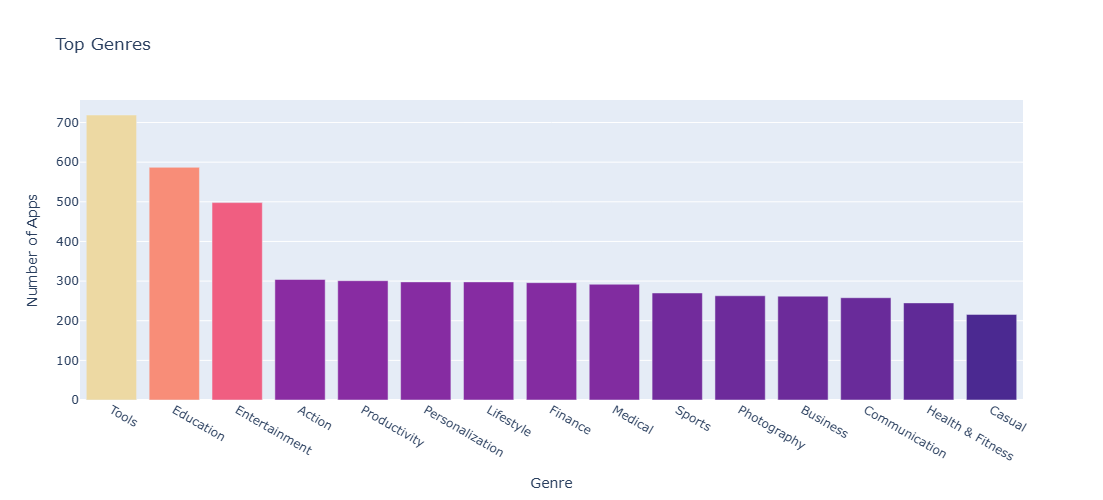

In [302]:
fig = px.bar(
    df_genres_stacked[0:15],
    title='Top Genres',
    color=df_genres_stacked.values[0:15],
    color_continuous_scale = "Agsunset",
    width= 1000,
    height=500
)

fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="Number of Apps",
    coloraxis_showscale=False
)

# fig.update_coloraxes(showscale=False)  # this would also have worked to get rid of the color axes

fig.show()

## 638 Grouped Bar Charts and Box Plots with Plotly

Now that we’ve looked at the total number of apps per category and the total number of apps per genre, let’s see what the split is between free and paid apps.

In [303]:
# let's start with the original dataframe
df_apps_clean4.head(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,0.00,Everyone,[Medical]
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,1.49,Everyone,[Arcade]
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,0.99,Everyone,[Arcade]
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,0.00,Everyone,[Arcade]
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.00,0.00,Everyone,[Medical]


In [305]:
df_apps_clean4["Type"].value_counts()

Type
Free    7595
Paid     589
Name: count, dtype: int64

We see that the majority of apps are free on the Google Play Store. But perhaps some categories have more paid apps than others. Let’s investigate. We can group our data first by Category and then by Type. Then we can add up the number of apps per each type. Using ```as_index=False``` we push all the data into columns rather than end up with our Categories as the index.

In [310]:
df_apps_clean4.groupby(["Category", "Type"]).count()

App  Rating  Reviews  Size_MBs  Installs  Price  \
Category          Type                                                    
ART_AND_DESIGN    Free   58      58       58        58        58     58   
                  Paid    3       3        3         3         3      3   
AUTO_AND_VEHICLES Free   72      72       72        72        72     72   
                  Paid    1       1        1         1         1      1   
BEAUTY            Free   42      42       42        42        42     42   
...                     ...     ...      ...       ...       ...    ...   
TRAVEL_AND_LOCAL  Paid    8       8        8         8         8      8   
VIDEO_PLAYERS     Free  144     144      144       144       144    144   
                  Paid    4       4        4         4         4      4   
WEATHER           Free   65      65       65        65        65     65   
                  Paid    7       7        7         7         7      7   

                        Revenue_Estimate  Content_Rating  Genres  
Category          Type                                            
ART_AND_DESIGN    Free                58              58      58  
                  Paid                 3               3       3  
AUTO_AND_VEHICLES Free                72              72      72  
                  Paid                 1               1       1  
BEAUTY            Free                42              42      42  
...                                  ...             ...     ...  
TRAVEL_AND_LOCAL  Paid                 8               8       8  
VIDEO_PLAYERS     Free               144             144     144  
                  Paid                 4               4       4  
WEATHER           Free                65              65      65  
                  Paid                 7               7       7  

[61 rows x 9 columns]

In [311]:
df_free_vs_paid = df_apps_clean4.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-46-00-2dc5178caf548bb86a9ad238e7dc671a.png" width=400 />

In [328]:
df_free_vs_paid.sort_values("App")

,Category,Type,App
3,AUTO_AND_VEHICLES,Paid,1
17,ENTERTAINMENT,Paid,2
24,FOOD_AND_DRINK,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2
48,SHOPPING,Paid,2
...,...,...,...
31,LIFESTYLE,Free,284
21,FINANCE,Free,289
53,TOOLS,Free,656
25,GAME,Free,834


In [329]:
df_free_vs_paid.sort_values("App", ascending=False)

,Category,Type,App
19,FAMILY,Free,1456
25,GAME,Free,834
53,TOOLS,Free,656
21,FINANCE,Free,289
31,LIFESTYLE,Free,284
...,...,...,...
24,FOOD_AND_DRINK,Paid,2
50,SOCIAL,Paid,2
40,PARENTING,Paid,2
48,SHOPPING,Paid,2


Unsurprisingly the biggest categories have the most paid apps. However, there might be some patterns if we put the numbers on a graph!

Use the plotly express bar chart examples and the .bar() API reference to create this bar chart:

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-46-44-c19715fca6ba4ca0dcaedfccb9725f83.png" width=800 />

You'll want to use the df_free_vs_paid DataFrame that you created above that has the total number of free and paid apps per category.

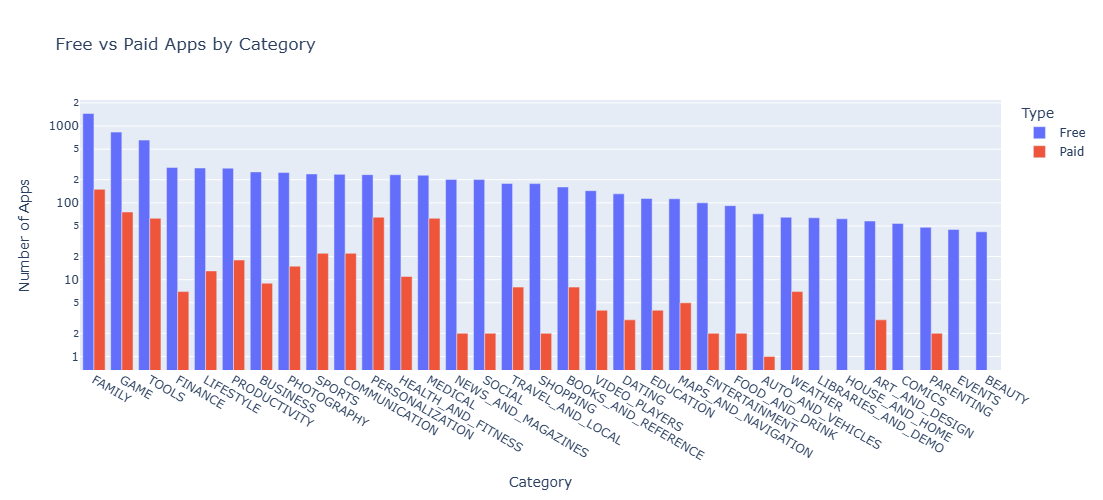

In [332]:
fig = px.bar(
    df_free_vs_paid.sort_values("App", ascending=False),
    x="Category",
    y="App",
    color="Type",
    barmode='group',
    width= 900,
    height=500,
    title='Free vs Paid Apps by Category',

)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Apps",
    yaxis=dict(type='log')  # to scale the y-axis
)


fig.show()

See if you can figure out how to get the look above by changing the ```categoryorder``` to 'total descending' as outlined in the documentation [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).

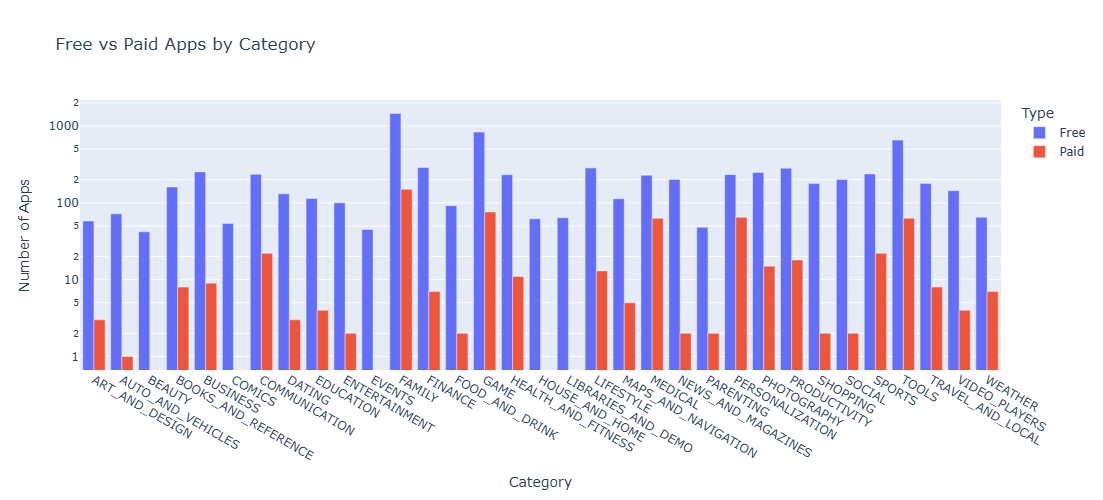

In [333]:
fig = px.bar(
    df_free_vs_paid,
    x="Category",
    y="App",
    color="Type",
    barmode='group',
    width= 900,
    height=500,
    title='Free vs Paid Apps by Category',

)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Apps",
    yaxis=dict(type='log')  # to scale the y-axis
)


fig.show()

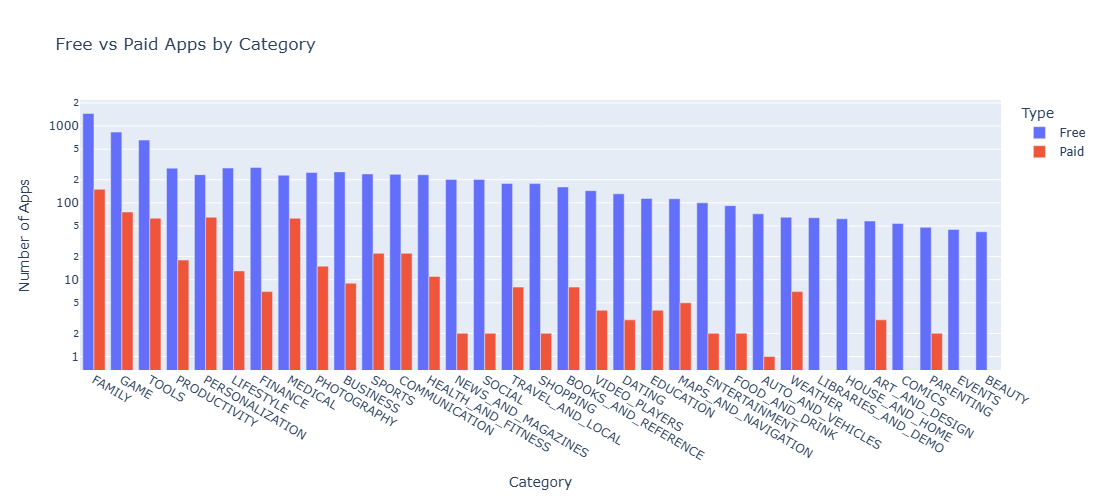

In [336]:
# Now let's change the order of the bars using category order

fig = px.bar(
    # df_free_vs_paid.sort_values("App", ascending=False),
    df_free_vs_paid,
    x="Category",
    y="App",
    color="Type",
    barmode='group',
    width= 900,
    height=500,
    title='Free vs Paid Apps by Category',

)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Apps",
    yaxis=dict(type='log')  # to scale the y-axis
)

fig.update_xaxes(categoryorder='total descending')

fig.show()

What we see is that while there are very few paid apps on the Google Play Store, some categories have relatively more paid apps than others, including Personalization, Medical and Weather. So, depending on the category you are targeting, it might make sense to release a paid-for app.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-51-08-e81782658c52bf6d2f1b28bff0662808.png" width=800 />


But this leads to many more questions:

- How much should you charge? What are other apps charging in that category?
- How much revenue could you make?
- And how many downloads are you potentially giving up because your app is paid?

Let’s try and answer these questions with some Box plots. Box plots show us some handy descriptive statistics in a graph - things like the median value, the maximum value, the minimum value, and some quartiles. Here’s what we’re after:

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-51-33-b158b5d866b0b6653796e51626017897.png" width=800 />

But how do we get there? This is your challenge.

**Challenge - Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?**

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the chart above.

**What is a box plot?**

In descriptive statistics, a box plot or boxplot is a method for demonstrating graphically the locality, spread and skewness groups of numerical data through their quartiles. In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also called the box-and-whisker plot and the box-and-whisker diagram.

Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot. 

<img  src="https://datatab.net/assets/tutorial/boxplot.png" width=500 />

In [356]:
df_apps_clean4.head(n=10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,0.00,Everyone,[Medical]
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,1.49,Everyone,[Arcade]
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,0.99,Everyone,[Arcade]
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,0.00,Everyone,[Arcade]
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.00,0.00,Everyone,[Medical]
114,FK Atlantas,SPORTS,1.5,2,26.0,5,Free,0.00,0.00,Everyone,[Sports]
126,Tablet Reminder,MEDICAL,5.0,4,2.5,5,Free,0.00,0.00,Everyone,[Medical]
128,CQ ESPM,BUSINESS,5.0,2,3.4,5,Free,0.00,0.00,Everyone,[Business]
141,Clinic Doctor EHr,MEDICAL,5.0,2,7.1,5,Free,0.00,0.00,Everyone,[Medical]
151,EB Cash Collections,BUSINESS,5.0,1,4.3,5,Free,0.00,0.00,Everyone,[Business]


In [337]:
df_free_vs_paid.head(n=5)

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [359]:
# we need the "Intalls" column for the desired output
df_free_vs_paid2 = df_apps_clean4.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count, 'Installs': pd.Series.sum})
df_free_vs_paid2.head()

,Category,Type,App,Installs
0,ART_AND_DESIGN,Free,58,114217100
1,ART_AND_DESIGN,Paid,3,16000
2,AUTO_AND_VEHICLES,Free,72,53079800
3,AUTO_AND_VEHICLES,Paid,1,50000
4,BEAUTY,Free,42,26916200


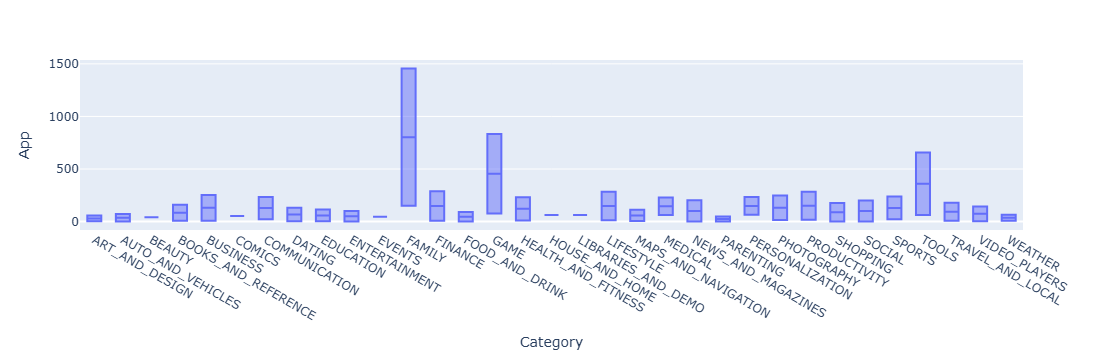

In [355]:
fig = px.box(
    df_free_vs_paid,
    x="Category",
    y="App",
)

fig.show()

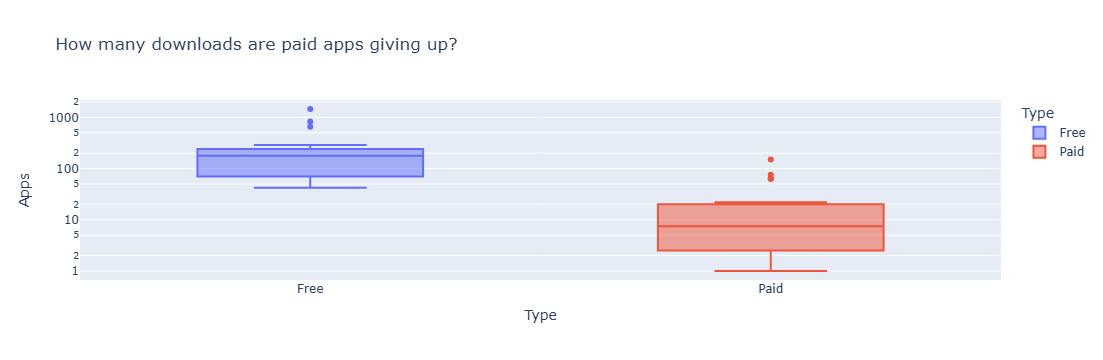

In [365]:
fig = px.box(
    df_free_vs_paid,
    x="Type",
    y="App",
    color="Type",
    title="How many downloads are paid apps giving up?"
)

fig.update_layout(
    xaxis_title="Type",
    yaxis_title="Apps",
    yaxis=dict(type='log')  # to scale the y-axis
)

fig.show()

In [366]:
print(f"The max no. of installs is {df_apps_clean4["Installs"].max()}")
print(f"The min no. of installs is {df_apps_clean4["Installs"].min()}")

The max no. of installs is 1000000000
The min no. of installs is 1


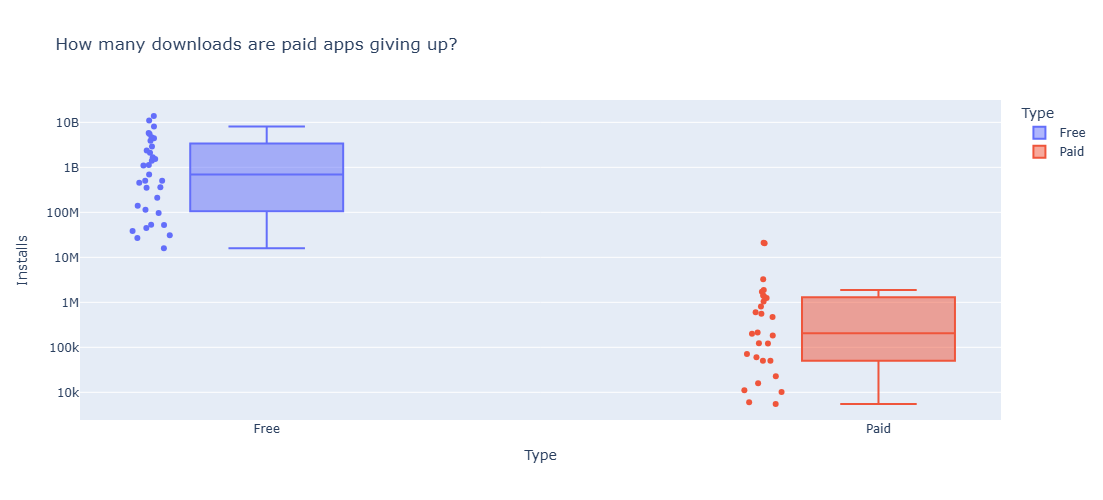

In [385]:
fig = px.box(
    df_free_vs_paid2,
    x="Type",
    y="Installs",
    color="Type",
    points="all",
    title="How many downloads are paid apps giving up?",
    width= 800,
    height=500
)

fig.update_layout(
    xaxis_title="Type",
    yaxis_title="Installs",
    yaxis=dict(type='log')  # to scale the y-axis
)

fig.update_traces(
    quartilemethod="exclusive",
    width=0.25,
)

fig.show()

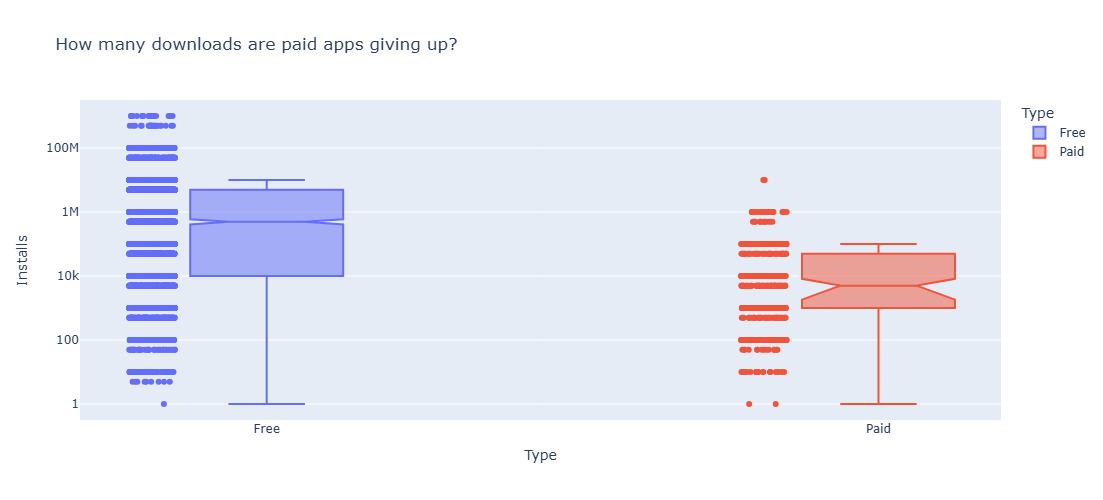

In [393]:
fig = px.box(
    df_apps_clean4,
    x="Type",
    y="Installs",
    color="Type",
    points="all",
    notched=True,
    title="How many downloads are paid apps giving up?",
    width= 800,
    height=500
)

fig.update_layout(
    xaxis_title="Type",
    yaxis_title="Installs",
    yaxis=dict(type='log')  # to scale the y-axis
)

fig.update_traces(
    quartilemethod="exclusive",
    width=0.25,
)

fig.show()

*From the hover text in the chart, we see that the median number of downloads for free apps is 500,000, while the median number of downloads for paid apps is around 5,000! This is massively lower.*

**But does this mean we should give up on selling a paid app? Let’s see how much revenue we would estimate per category.**

**Challenge: See if you can generate the chart below:**

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-54-47-0e957e51ecdff5ccaba35b99cdc17a06.png" width=800 />

In [388]:
df_apps_clean4.head(n=5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,0.00,Everyone,[Medical]
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,1.49,Everyone,[Arcade]
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,0.99,Everyone,[Arcade]
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,0.00,Everyone,[Arcade]
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.00,0.00,Everyone,[Medical]


In [390]:
df_apps_paid_only = df_apps_clean4[df_apps_clean4["Type"] == 'Paid']

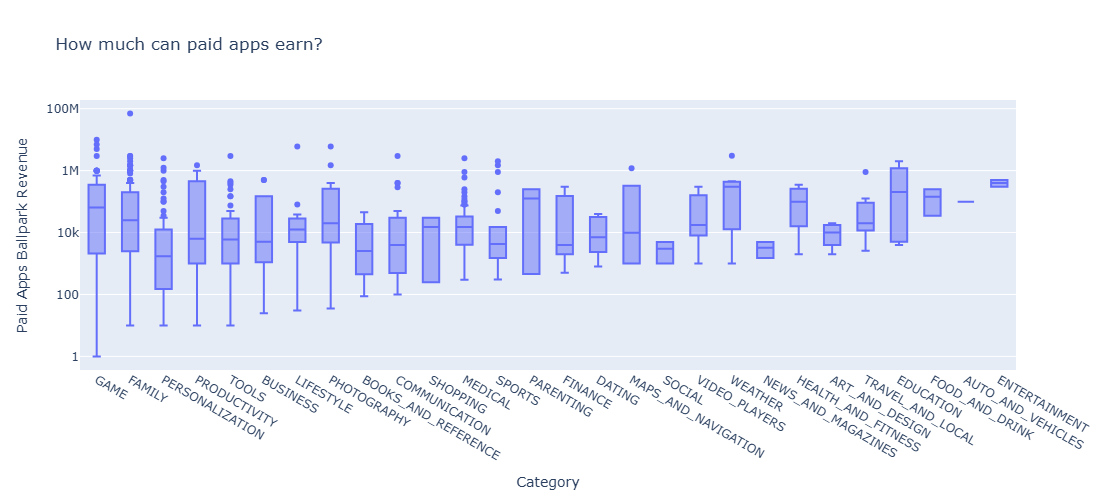

In [398]:
fig = px.box(
    df_apps_paid_only,
    x="Category",
    y="Revenue_Estimate",
    title="How much can paid apps earn?",
    width= 1000,
    height=500
)

fig.update_layout(
    yaxis_title="Paid Apps Ballpark Revenue",
    xaxis_title="Category",
    yaxis=dict(type='log'),  # to scale the y-axis
)

fig.update_xaxes(categoryorder='min ascending')

fig.show()

*Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?*

If an Android app costs USD 30,000 to develop, then the average app in very few categories would cover that development cost. The median paid photography app earned about USD 20,000. Many more app’s revenues were even lower - meaning they would need other sources of revenue like advertising or in-app purchases to make up for their development costs. However, certain app categories seem to contain a large number of outliers that have much higher (estimated) revenue - for example in Medical, Personalisation, Tools, Game, and Family.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-55-50-fba0062772e999739ca28119fd0cecda.png"/>

**Challenge - What is the median price for a paid app?**

**Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using {categoryorder':'max descending'} to sort the categories.**

In [396]:
df_apps_paid_only["Price"].median()

np.float64(2.99)

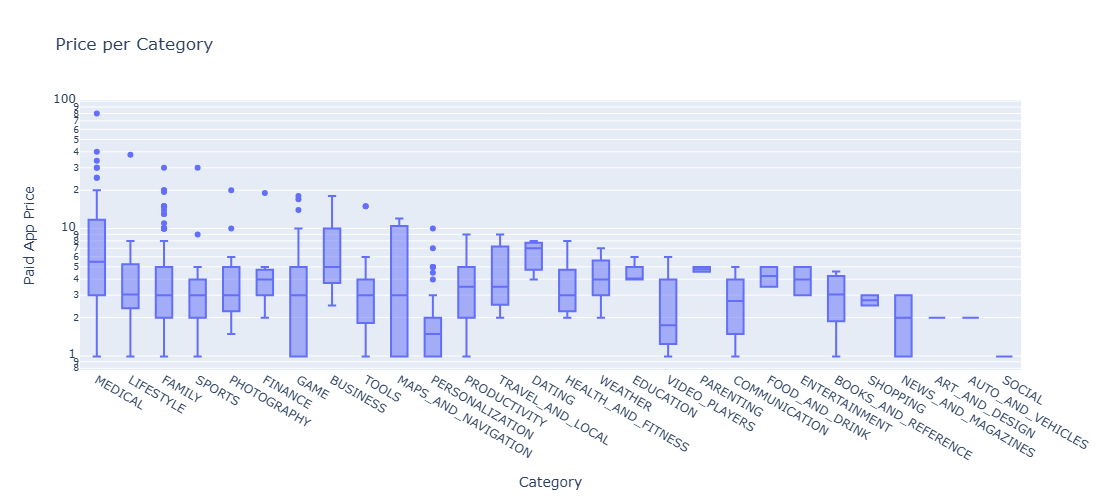

In [400]:
fig = px.box(
    df_apps_paid_only,
    x="Category",
    y="Price",
    title="Price per Category",
    width= 1000,
    height=500
)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Paid App Price",
    yaxis=dict(type='log'),  # to scale the y-axis
)

fig.update_xaxes(categoryorder='max descending')

fig.show()

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-11_13-58-35-1c571e911d585782aabbb42b2bb96baf.png" />

## 639 Learning Points & Summary


In this lesson we looked at how to:

- Pull a random sample from a DataFrame using .sample()
- How to find duplicate entries with .duplicated() and .drop_duplicates()
- How to convert string and object data types into numbers with .to_numeric()
- How to use plotly to generate beautiful pie, donut, and bar charts as well as box and scatter plots

Well done on completing today's lessons! 👏👏👏 I hope you enjoyed today’s Google Play Store analysis. It's incredible how much more of a clear picture we can get about the app ecosystem just by looking into some scraped website data for the Google Play Store.



##### fin